<a href="https://colab.research.google.com/github/OriolMossinger/OriolMossinger/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate in New York City

Welcome to my data visualization project centered around the Kaggle New York Housing Market dataset. In this endeavor, I will delve into the intricacies of New York's housing market, aiming to uncover valuable insights and trends. Through the power of data visualization, I will transform raw data into visually compelling representations, allowing us to explore factors influencing property prices, regional disparities, and more. Join me on this journey as we use Python's data visualization libraries to paint a vivid picture of New York's real estate landscape.

## Google Colab configuration

In [ ]:
# Set up the proper configuration of Google Colab:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the current working directory to the specified path:

%cd '/content/drive/My Drive/Data Scientist/Data Visualization'

/content/drive/My Drive/Data Scientist/Data Visualization


In [ ]:
# Check the specified path is correct:

!ls

'Data Visualization.ipynb'   kaggle.json   new-york-housing-market.zip	 NY-House-Dataset.csv


## Kaggle API configuration

In [ ]:
# Set the environment variable 'KAGGLE_CONFIG_DIR' to the directory
# path in Google Drive:

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Data Scientist/Data Visualization'

In [ ]:
# Download the dataset from Kaggle:

!kaggle datasets download -d nelgiriyewithana/new-york-housing-market

new-york-housing-market.zip: Skipping, found more recently modified local copy (use --force to force download)


## Libraries importation

In [ ]:
# Import the libraries that will be used to visualize data:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
!pip install mapclassify
import folium

## Dataset's structure

In [ ]:
# Specify the zip file:

zip_file_name = 'new-york-housing-market.zip'

In [ ]:
# Unzip the file in the current working directory:

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
# Import the dataset to this project:

df = pd.read_csv('NY-House-Dataset.csv')

In [ ]:
# Check the five first rows:

df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
# Check the names of the columns and its types:

column_info = df.dtypes
print(column_info)

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object


In [ ]:
# Check for null and NaN values in the dataset:

null_counts = df.isnull().sum()

# Display the counts of null/NaN values for each column:

print(null_counts)

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


## Relationship Between Price and Property Square Footage

The following scatter plot visualizes the relationship between "PRICE" and "PROPERTYSQFT" in the New York housing market dataset. By plotting property square footage against price, we can explore whether there is a discernible trend or correlation between these two key factors. This analysis will help us gain insights into how property size influences pricing patterns, providing valuable information for potential real estate investors and market analysts.

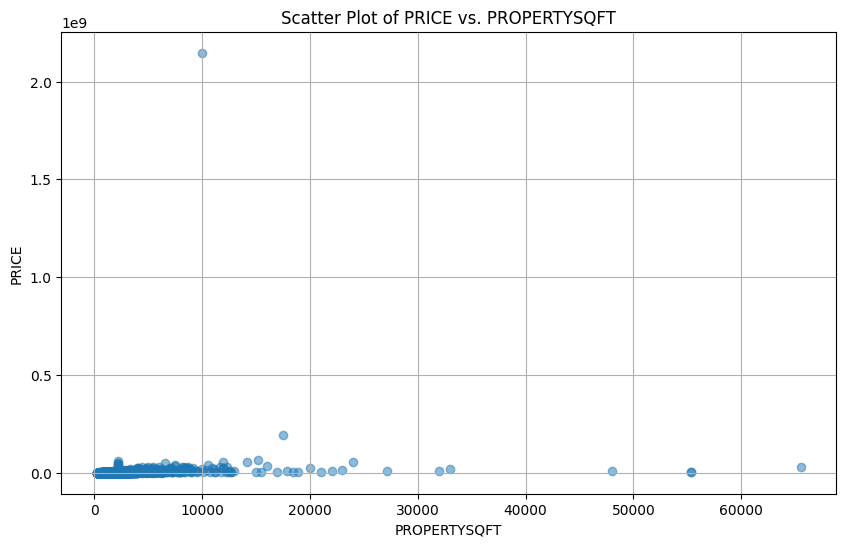

In [ ]:
# Scatter plot between "PRICE" and "PROPERTYSQFT"

plt.figure(figsize=(10, 6))
plt.scatter(df['PROPERTYSQFT'], df['PRICE'], alpha=0.5)
plt.title('Scatter Plot of PRICE vs. PROPERTYSQFT')
plt.xlabel('PROPERTYSQFT')
plt.ylabel('PRICE')
plt.grid(True)
plt.show()

The presence of extreme values can indeed render our scatter plot less informative. Therefore, the next crucial step is to identify and remove these outliers from our dataset. Once this data cleaning process is complete, we can then proceed to recreate the scatter plot. By doing so, we aim to present a more accurate and meaningful representation of the relationship between "PRICE" and "PROPERTYSQFT," free from the potential distortions introduced by extreme values.

In [ ]:
# Calculate the 1st quartile (Q1) of the "PRICE" column:

Q1 = df['PRICE'].quantile(0.25)

# Calculate the 3rd quartile (Q3) of the "PRICE" column:

Q3 = df['PRICE'].quantile(0.75)

# Calculate the Interquartile Range (IQR) for "PRICE":

IQR = Q3 - Q1

# Define a threshold for identifying outliers (typically 1.5 times IQR):

threshold = 1.5 * IQR

# Remove outliers from the dataset based on the defined threshold:

df_clean = df[(df['PRICE'] >= Q1 - threshold) & (df['PRICE'] <= Q3 + threshold)]

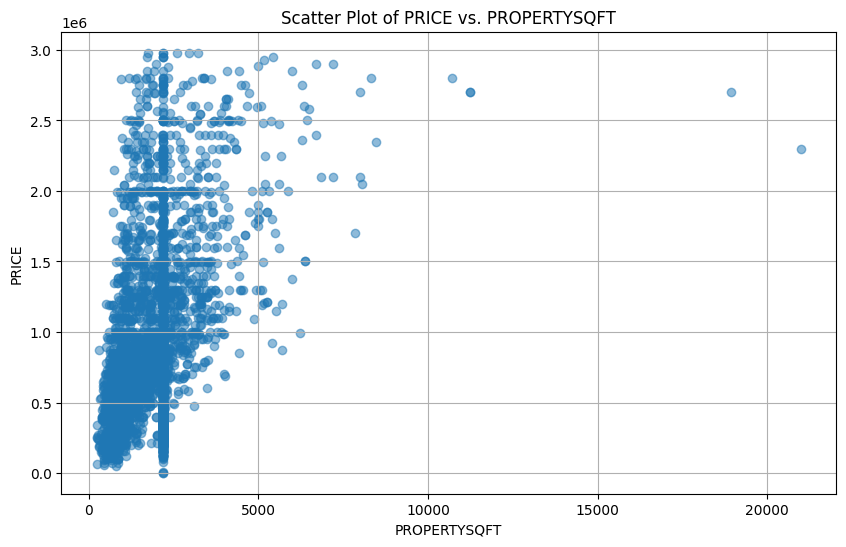

In [ ]:
# New Scatter plot between "PRICE" and "PROPERTYSQFT"

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['PROPERTYSQFT'], df_clean['PRICE'], alpha=0.5)
plt.title('Scatter Plot of PRICE vs. PROPERTYSQFT')
plt.xlabel('PROPERTYSQFT')
plt.ylabel('PRICE')
plt.grid(True)
plt.show()

## Average price per Sublocality and its standard deviation

In this analysis, we explore the average property prices within different sublocalities, shedding light on the variations in pricing across areas. Additionally, we examine the standard deviation, a measure of price dispersion, to gauge the level of price variability within each sublocality. This investigation provides valuable insights into the pricing dynamics of sublocalities, allowing for a deeper understanding of the real estate market's regional nuances and potential investment opportunities.






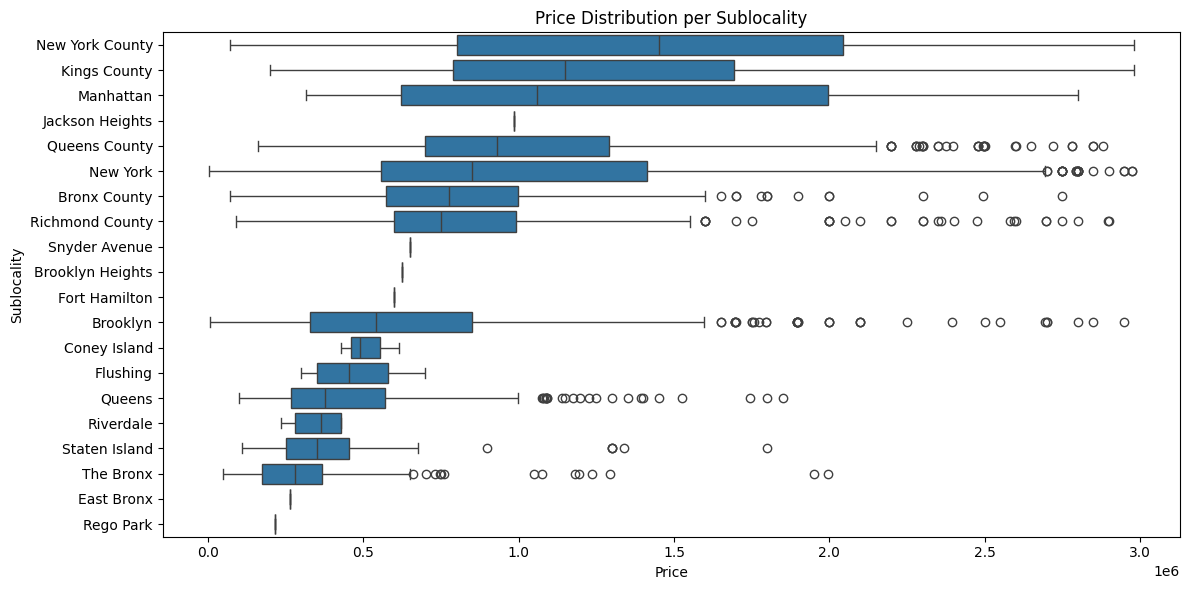

In [ ]:
# Calculate the order of sublocalities by average price:

order_by_price = df_clean.groupby('SUBLOCALITY')['PRICE'].median().sort_values(ascending=False).index

# Make the Box Plot:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='PRICE', y='SUBLOCALITY', order=order_by_price)
plt.title('Price Distribution per Sublocality')
plt.xlabel('Price')
plt.ylabel('Sublocality')
plt.tight_layout()
plt.show()

## Most expensive properties locations

I will use 'Folium' to visualize the most expensive New York City properties from the dataset, categorizing and mapping their locations. This spatial perspective will reveal real estate price patterns. I will identify the top ten expensive properties and label them with their prices.

In [ ]:
# Filter the top ten expensive properties:

top_10_expensive = df.sort_values(by='PRICE', ascending=False).head(10)
top_10_expensive

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.000000,10000.000000,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
69,Brokered by Sotheby's International Realty - E...,Townhouse for sale,65000000,3,2.373861,15200.000000,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,New York,New York County,New York,East 79th Street,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317
1075,Brokered by COMPASS,Co-op for sale,60000000,8,8.000000,2184.207862,960 5th Ave Unit 12,"Manhattan, NY 10075","960 5th Ave Unit 12Manhattan, NY 10075",New York,New York County,New York,Manhattan,960,"960 5th Ave #12, New York, NY 10075, USA",40.775642,-73.964247
141,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,56000000,11,10.000000,24000.000000,9 W 54th St,"New York, NY 10019","9 W 54th StNew York, NY 10019",United States,New York,New York County,New York,West 54th Street,"9 W 54th St, New York, NY 10019, USA",40.761600,-73.976191
99,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,55000000,8,8.000000,12000.000000,25 Riverside Dr,"New York, NY 10023","25 Riverside DrNew York, NY 10023",United States,New York,New York County,New York,Riverside Drive,"25 Riverside Dr, New York, NY 10023, USA",40.782238,-73.984632
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
626,"Brokered by Nest Seekers International, Midtown",Condo for sale,50000000,6,6.000000,6569.000000,100 Vandam St Apt 20A,"New York, NY 10013","100 Vandam St Apt 20ANew York, NY 10013",New York,New York County,New York,Manhattan,100,"100 Vandam St #20a, New York, NY 10013, USA",40.726633,-74.008832
1453,Brokered by Corcoran East Side,Co-op for sale,48000000,5,2.373861,2184.207862,740 Park Ave # 4 & 5B,"New York, NY 10021","740 Park Ave # 4 & 5BNew York, NY 10021",New York,New York County,New York,Manhattan,740,"740 Park Ave #5, New York, NY 10021, USA",40.770752,-73.964528
3388,Brokered by Sotheby's International Realty - E...,Co-op for sale,45000000,5,2.373861,2184.207862,4 E 66th St Fl 7,"New York, NY 10065","4 E 66th St Fl 7New York, NY 10065",New York,New York County,New York,Manhattan,4,"4 E 66th St Fl 7, New York, NY 10065, USA",40.768301,-73.969734


In [ ]:
# This function formats a numerical price by adding dots every three digits
# for readability.

def format_price(price):
    """
    Format a numeric price value for readability.

    This function takes a numeric price value and formats it by inserting a dot
    every three digits.
    It's primarily used to enhance the readability of large numbers.
    The function first formats the number with commas using Python's string
    formatting capabilities and then replaces commas with dots.

    Parameters:
    price (int or float): The price value to be formatted.

    Returns:
    str: A string representation of the price with dots added for every
    three digits.
    """
    return f"{price:,}".replace(",", ".")

In [ ]:
# Apply the format_price function to the 'PRICE' column of the top_10_expensive
# dataset. This creates a new column 'FORMATTED_PRICE', where each price is
# formatted with dots for better readability.

top_10_expensive['FORMATTED_PRICE'] = top_10_expensive['PRICE'].apply(format_price)


In [ ]:
# Create a map in a average location:

m = folium.Map(location=[top_10_expensive['LATITUDE'].mean(),
                         top_10_expensive['LONGITUDE'].mean()], zoom_start=12)

# Add points to the map:

for _, row in top_10_expensive.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"<i>{row['FORMATTED_PRICE']}</i>",
        tooltip=f"<i>{row['MAIN_ADDRESS']}</i>"
    ).add_to(m)

# Show the map:

m

Although the most expensive property is located on Amboy Road, the majority of the high-priced properties are concentrated around Central Park. This suggests that while Amboy Road might host an exceptionally high-value property, Central Park is the area where the upscale real estate market is more densely populated. This could be due to various factors such as the prestige of the location, proximity to key amenities, and the scenic value of Central Park, which collectively contribute to higher property values in that area.